# Random-Forest Structure-Property Model

In [1]:
import sys, os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from sklearn.metrics import mean_absolute_error

import chromofp as fp

sys.path.append('../../Woodward_Fieser_Rules-main/src/')
import chromopredict as cp

In [2]:
d_ood = {
    'E01': {'smiles': 'C=CC(=O)C', 'nm_exp': 214},
    'E02': {'smiles': 'C=CC(=O)CCCCCCCCCC', 'nm_exp': 212},
    'E03': {'smiles': 'C=CC(=O)CC1CCCCC1', 'nm_exp': 213},
    'E04': {'smiles': 'C=CC(=O)CC1=CC=CC=C1', 'nm_exp': 210},
    'E05': {'smiles': 'C=CC(=O)C1CCCCC1', 'nm_exp': 212},
    'E06': {'smiles': 'C=CC(=O)C1CCC2(CC1)OCCO2', 'nm_exp': 214},
    'E07': {'smiles': 'C=CC(=O)C1CCCCCC1', 'nm_exp': 212.5},
    'E08': {'smiles': 'C=C1CCCC1=O', 'nm_exp': 231},
    'E09': {'smiles': 'C=C1CCCCC1=O', 'nm_exp': 230},
    'E10': {'smiles': 'C=C1CCCCCC1=O', 'nm_exp': 230},
    'E11': {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3C(=O)C[C@]2(C)C1=O)OC(=O)C', 'nm_exp': 228},
    'E12': {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3[C@H](C[C@]2(C)C1=O)O)O', 'nm_exp': 227},
    'E13': {'smiles': 'C1CCC(=C2CCCC2=O)C1', 'nm_exp': 259},
    'E14': {'smiles': 'C1CCC(=C2CCCCC2=O)CC1', 'nm_exp': 257},
    'E15': {'smiles': 'CCCCCCCC[C@H]1CC(=O)C2=C3CC[C@H]4C[C@H](CC[C@]4(C)[C@H]3CC[C@]12C)OC(=O)C', 'nm_exp': 257},
    'E16': {'smiles': 'CCCCCCCC[C@H]1C[C@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 256},
    'E17': {'smiles': 'CCCCCCCC[C@H]1C[C@@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 257},
    'E18': {'smiles': 'CC(=O)C1=C(C)CCCC1', 'nm_exp': 247},
    'E19': {'smiles': 'CC(C)=C1CCC(C)CC1=O', 'nm_exp': 252},
    'E20': {'smiles': 'CC1=CC(=O)CC(C)(C)C1', 'nm_exp': 235},
    'E21': {'smiles': 'CC1=C2CCCCC2CCC1=O', 'nm_exp': 239},
    'E22': {'smiles': 'CC(=C1CCCCC1)C(=O)C', 'nm_exp': 242},
    'E23': {'smiles': 'C[C@@H]1CCC(=C(C)C)C(=O)C1', 'nm_exp': 252},
    'E24': {'smiles': 'C[C@H](CCCC(C)C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=C(C(=O)CC[C@]34C)Br)C', 'nm_exp': 256},
    'E25': {'smiles': 'CC12CCC(=O)C(Br)=C1CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12', 'nm_exp': 254},
    'E26': {'smiles': 'CC1=C(C(=O)C(CC1)C(C)C)O', 'nm_exp': 270},
    #'E27': {'smiles': 'C[C@@]12CCC[C@H]1[C@H]3[C@H](CC2)[C@]4(CCC=CC4=CC3=O)C', 'nm_exp': 278},
    #'E28': {'smiles': 'CC1=CCCC2(C)CCC(=O)C=C12', 'nm_exp': 287},
    #'E29': {'smiles': 'CC(=O)C=CC1=C(C)CCCC1(C)C', 'nm_exp': 283},
    #'E30': {'smiles': 'CC(=O)OC1(C)C=CC=CC1=O', 'nm_exp': 300}
}

for idx, d_ in d_ood.items():
    smi = d_['smiles']
    if smi != '':
        d_['nm_wf'], _, _ = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward')
        d_['nm_wfe'], _, _ = cp.predict(smi, solvent=None, verbose=False, draw=False, chromlib='woodward_extended')
        d_['nm_wfr'], _, _ = cp.predict(smi, solvent=None, verbose=False, draw=False, chromlib='woodward_refine')

df_inference = pd.DataFrame.from_dict(d_ood, orient='index')
df_inference.head(3)

,smiles,nm_exp,nm_wf,nm_wfe,nm_wfr
E01,C=CC(=O)C,214.0,215,213,212
E02,C=CC(=O)CCCCCCCCCC,212.0,215,213,212
E03,C=CC(=O)CC1CCCCC1,213.0,215,213,212


In [3]:
df_all = pd.read_csv('ds_enones_b3lyp_woodward_1state.csv')
df = df_all[df_all["moltype"].isin(["ketone", "cyclohexenone", "cyclopentenone"])].reset_index(drop=True)
df.head(3)

,Unnamed: 0,smiles,moltype,solvent,nm_b3lyp,nm_wf,nm_wfr,nm_wfe
0,0,O=C(C)/C(C)=C(C)\OC,ketone,NaN,246.3,255,245,247
1,1,O=C(C)/C(C)=C(C)\Cl,ketone,NaN,248.7,237,245,247
2,2,O=C(C)/C(C)=C(C)\Br,ketone,NaN,251.0,255,256,247


In [4]:
mae_wf = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wf'])
print('Woodward-Fieser, MAE: '+str(int(mae_wf))+' nm (on inference data)')

Woodward-Fieser, MAE: 5 nm (on inference data)


## 1) Topological Torsions Fingerprints

In [5]:
X, y = fp.get_tt_fp_data(df=df)
X_train, X_test, y_train, y_test = fp.get_data_split(X,y)
model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)

print('MAE: '+str(int(mae))+' nm (on test data)')

MAE: 8 nm (on test data)


#### 1a) TTFP on test data

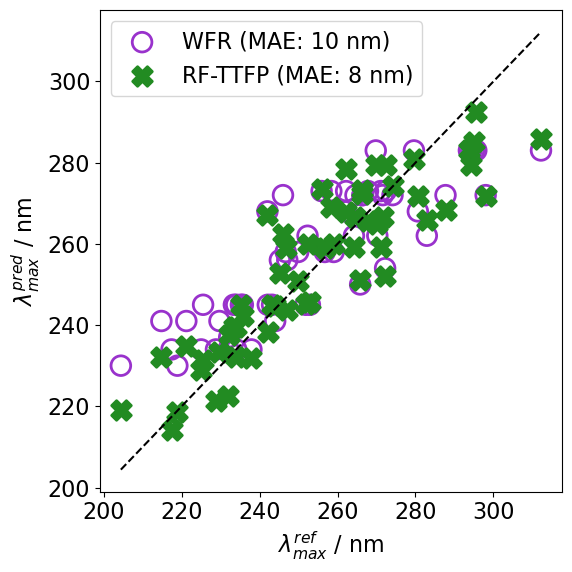

In [6]:
# predict on test data
y_pred = model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_ttfp'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_ttfp_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_ttfp'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_ttfp'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-TTFP (MAE: {int(mae_ttfp_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-ttfp_test.pdf'
)

#### 1b) TTFP on inference data

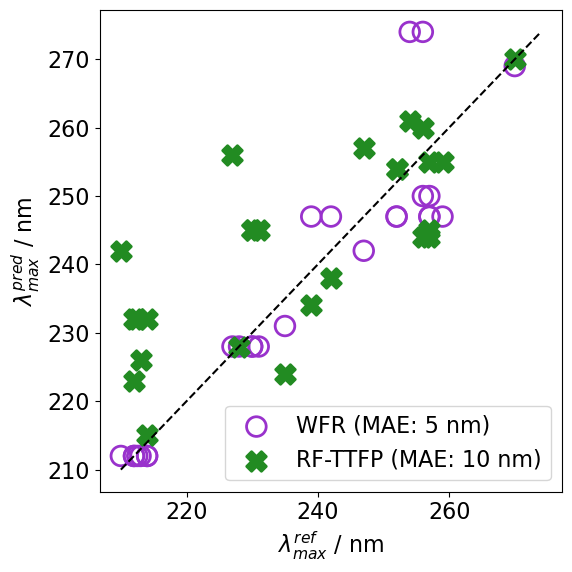

In [7]:
# predict on inference data
df_inference['nm_rf_ttfp'] = df_inference['smiles'].apply(lambda smi: fp.get_ttfp_pred(smi, X_test, model))
mae_ttfp_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_ttfp'])
mae_wf_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wfr'])
#print('TTFP, MAE: '+str(int(mae_ttfp))+' nm (on inference data)')

# scatterplot predictions
fp.plot_multiple_scatter(
    df_inference,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_ttfp'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-TTFP (MAE: {int(mae_ttfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-ttfp_inference.pdf'
)

## 2) Rooted Fingerprints

In [8]:
X, y = fp.get_rooted_fp_data(df=df)
X_train, X_test, y_train, y_test = fp.get_data_split(X,y)
model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)

print('MAE: '+str(int(mae))+' nm (on test data)')

MAE: 10 nm (on test data)


#### 2a) RFP on test data

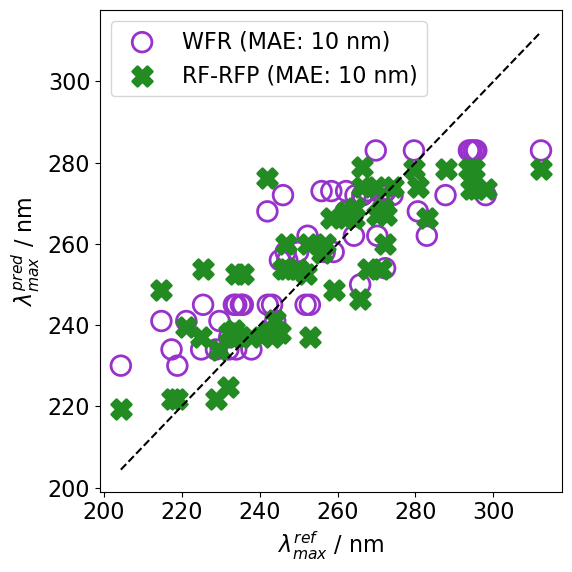

In [9]:
# predict on test data
y_pred = model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_rfp'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_rfp_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_rfp'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_rfp'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-RFP (MAE: {int(mae_rfp_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-rfp_test.pdf'
)

#### 2b) RFP on inference data

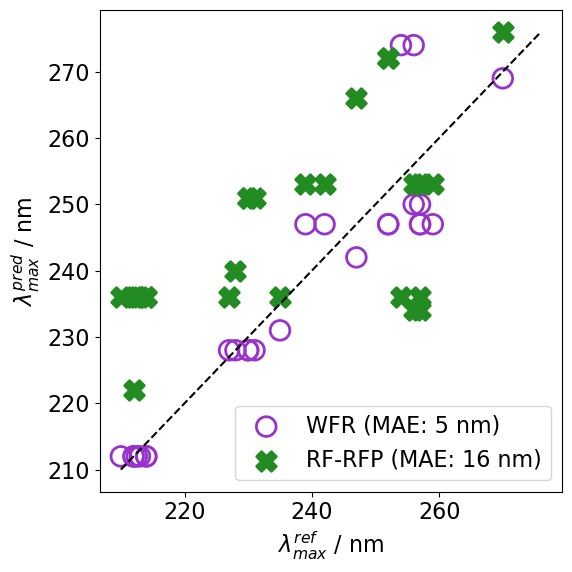

In [10]:
# predict on inference data
df_inference['nm_rf_rfp'] = df_inference['smiles'].apply(lambda smi: fp.get_rfp_pred(smi, X_test, model))
mae_rfp_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_rfp'])
mae_wf_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wfr'])
#print('TTFP, MAE: '+str(int(mae_ttfp))+' nm (on inference data)')

# scatterplot predictions
fp.plot_multiple_scatter(
    df_inference,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_rfp'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-RFP (MAE: {int(mae_rfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-rfp_inference.pdf'
)


## 3) MACCS keys

In [11]:
X, y = fp.get_maccs_fp_data(df=df)
X_train, X_test, y_train, y_test = fp.get_data_split(X,y)
model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)

print('MAE: '+str(int(mae))+' nm')

MAE: 12 nm


#### 3a) MACCS-FP on test data

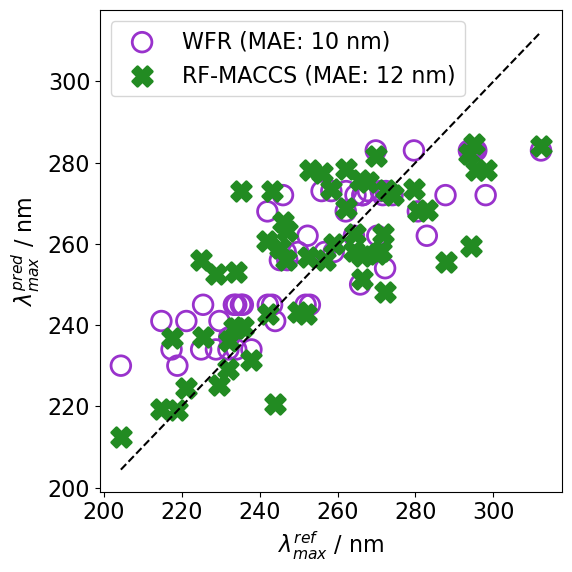

In [12]:
# predict on test data
y_pred = model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_maccs'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_maccs_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_maccs'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_maccs'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-MACCS (MAE: {int(mae_maccs_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-maccs_test.pdf'
)

#### 3b) MACCS-FP on inference data

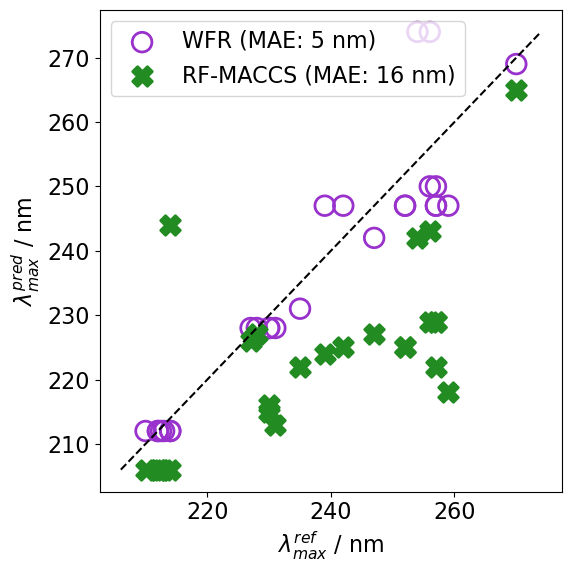

In [13]:
# predict on inference data
df_inference['nm_rf_maccs'] = df_inference['smiles'].apply(lambda smi: fp.get_maccs_pred(smi, X_test, model))
mae_rfp_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_maccs'])
mae_wf_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wfr'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_inference,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_maccs'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-MACCS (MAE: {int(mae_rfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-maccs_inference.pdf'
)


## 4) Feature Morgan Fingerprints

In [14]:
radii = [1, 2, 3, 4]
fp_sizes = [1024, 2048]

results = {}
for radius in radii:
    for fp_size in fp_sizes:
        print('Train model: '+str(radius)+' radius, '+str(fp_size)+' length')
        X, y = fp.get_morgan_fp_data(df=df, radius=radius, fp_size=fp_size)
        X_train, X_test, y_train, y_test = fp.get_data_split(X,y)
        model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)
        results[(radius, fp_size)] = {'X_train': X_train,
                                      'X_test': X_test,
                                      'y_train': y_train,
                                      'y_test': y_test,
                                      'model': model, 
                                      'mae': mae
                                     }


Train model: 1 radius, 1024 length
Train model: 1 radius, 2048 length
Train model: 2 radius, 1024 length
Train model: 2 radius, 2048 length
Train model: 3 radius, 1024 length
Train model: 3 radius, 2048 length
Train model: 4 radius, 1024 length
Train model: 4 radius, 2048 length


In [15]:
best_params = min(results, key=lambda k: results[k]['mae'])
print('Best parameters: '+str(best_params[0])+' radius, '+str(best_params[1])+' vector length')

# Extract best model and MAE
best_model = results[best_params]['model']
best_mae = results[best_params]['mae']

print('Feature Morgan FP, MAE: '+str(int(best_mae))+' nm')

Best parameters: 2 radius, 1024 vector length
Feature Morgan FP, MAE: 9 nm


#### 4a) FMFP on test data

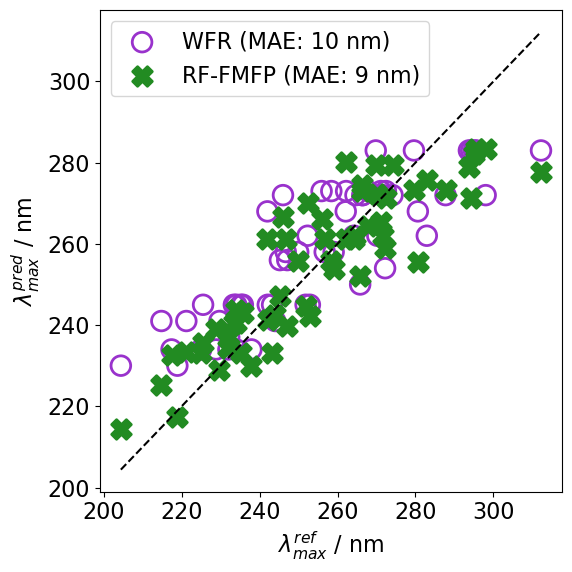

In [16]:
# predict on test data
X_test = results[best_params]['X_test']
y_pred = best_model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_fmfp'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_fmfp_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_fmfp'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_fmfp'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-FMFP (MAE: {int(mae_fmfp_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-fmfp_test.pdf'
)


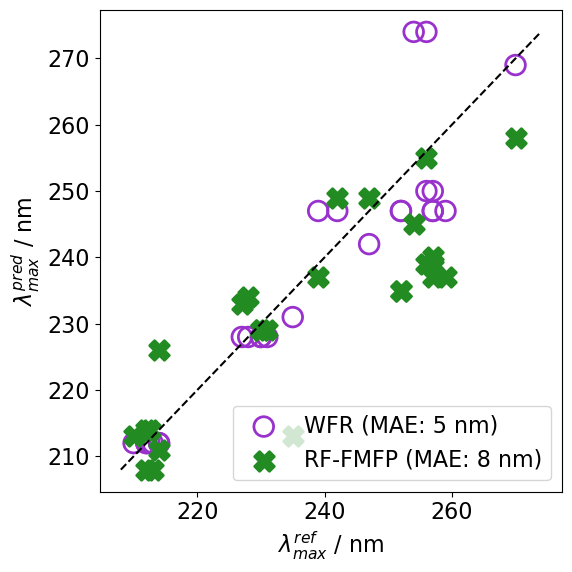

In [17]:
# predict on inference data
df_inference['nm_rf_fmfp'] = df_inference['smiles'].apply(lambda smi: 
                                                          fp.get_fmfp_pred(smi, X_test, model=best_model, params=best_params))
mae_rfp_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_fmfp'])
mae_wf_ood = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wfr'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_inference,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_fmfp'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-FMFP (MAE: {int(mae_rfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-fmfp_inference.pdf'
)


In [18]:
#df_inference.to_csv('data_wf_rf-fit_samples.csv')

#### 3c) Inform FMFP models additionally by substituent info from Woodward

In [19]:
# add WF features to the datasets

df_wf_ood = fp.process_smiles_df(df_inference, y_str='nm_exp')
df_wf_tt = fp.process_smiles_df(df, y_str='nm_b3lyp')

df_wf_tt.count()

smiles       288
nm_b3lyp     288
nm_wf        288
nm_wfr       288
base         288
exo          288
alpha_num    288
beta_num     288
Nsub         288
dtype: int64

In [20]:
df_wf_tt.head(5)

,smiles,nm_b3lyp,nm_wf,nm_wfr,base,exo,alpha_num,beta_num,Nsub
0,O=C(C)/C(C)=C(C)\OC,246.3,255,245,215,0,10,30,3
1,O=C(C)/C(C)=C(C)\Cl,248.7,237,245,215,0,10,12,3
2,O=C(C)/C(C)=C(C)\Br,251.0,255,256,215,0,10,12,3
3,O=C(C)/C(C)=C(C)\O,236.5,255,241,215,0,10,12,3
4,O=C(C)/C(C)=C/C,221.2,237,241,215,0,10,12,2


In [21]:
X, y = fp.get_morgan_fp_data(df=df_wf_tt, radius=2, fp_size=1024)

# Select the additional features you want to add
additional_features = df_wf_tt[['exo', 'alpha_num', 'beta_num', 'Nsub']].reset_index(drop=True)
X_wf = pd.concat([X, additional_features], axis=1)

# data splitting and model training
X_train, X_test, y_train, y_test = fp.get_data_split(X_wf,y)
model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)

print('FMFP + WF increments, MAE: '+str(int(mae))+' nm')

FMFP + WF increments, MAE: 8 nm


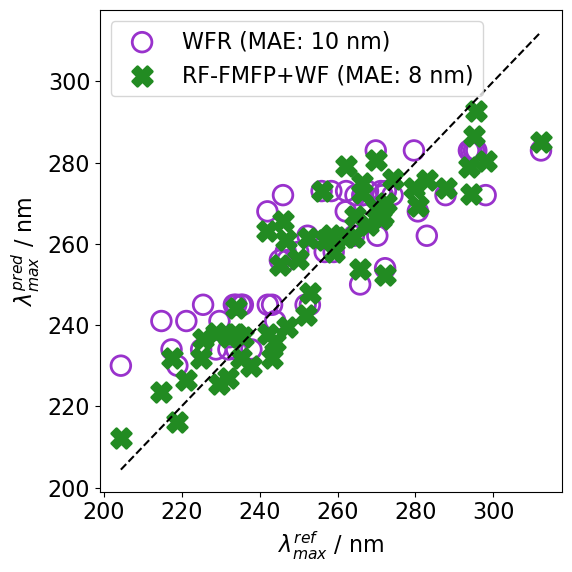

In [22]:
# predict on test data
y_pred = model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_fmfp-wf'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_fmfp_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_fmfp-wf'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_fmfp-wf'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-FMFP+WF (MAE: {int(mae_fmfp_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-fmfp-wf_test.pdf'
)


In [23]:
fp_array = np.stack(df_wf_ood['smiles'].map(lambda smi: fp.featurize(smi, 2, 1024)))
X_inf = pd.DataFrame(fp_array, columns=[f'fp_{i}' for i in range(fp_array.shape[1])])
y_inf = df_wf_ood['nm_exp']

# Select the additional features you want to add
additional_features = df_wf_ood[['exo', 'alpha_num', 'beta_num', 'Nsub']].reset_index(drop=True)
X_wf_inf = pd.concat([X_inf, additional_features], axis=1)


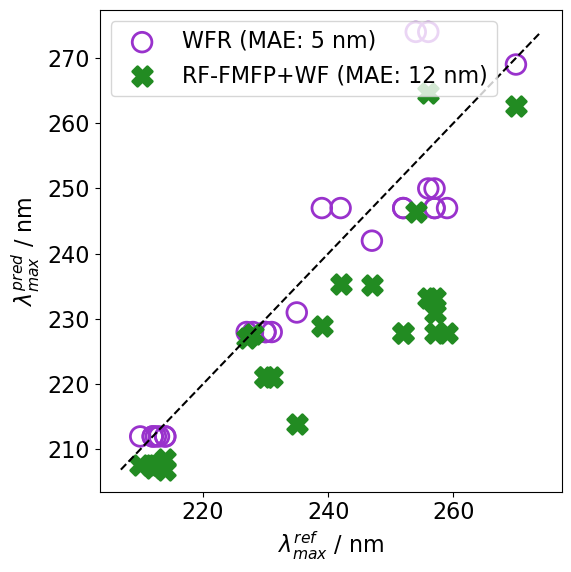

In [24]:
# predict on inference data
df_wf_ood['nm_rf_fmfp_wf'] = model.predict(X_wf_inf)

mae_rfp_ood = mean_absolute_error(df_wf_ood['nm_exp'], df_wf_ood['nm_rf_fmfp_wf'])
mae_wf_ood = mean_absolute_error(df_wf_ood['nm_exp'], df_wf_ood['nm_wfr'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_wf_ood,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_fmfp_wf'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-FMFP+WF (MAE: {int(mae_rfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-fmfp-wf_inference.pdf'
)


### 3d) Compare with only woodward informed prediction

In [25]:
X = df_wf_tt[['exo', 'alpha_num', 'beta_num', 'Nsub']]
y = df_wf_tt['nm_b3lyp']

X_train, X_test, y_train, y_test = fp.get_data_split(X,y)
model, mae = fp.train_rf_model(X_train, X_test, y_train, y_test)

print('WF increments, MAE: '+str(int(mae))+' nm')

WF increments, MAE: 11 nm


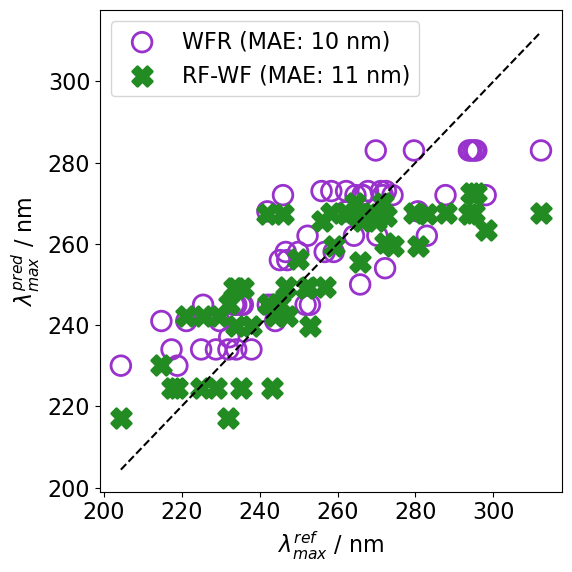

In [29]:
# predict on test data
y_pred = model.predict(X_test)
df_test = df.loc[X_test.index].copy()
df_test['nm_rf_wf'] = y_pred

mae_wf_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_wfr'])
mae_fmfp_test = mean_absolute_error(df_test['nm_b3lyp'], df_test['nm_rf_wf'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_test,
    x_col='nm_b3lyp',
    y_cols=['nm_wfr', 'nm_rf_wf'],
    labels=[f'WFR (MAE: {int(mae_wf_test)} nm)', f'RF-WF (MAE: {int(mae_fmfp_test)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-wf_test.pdf'
)


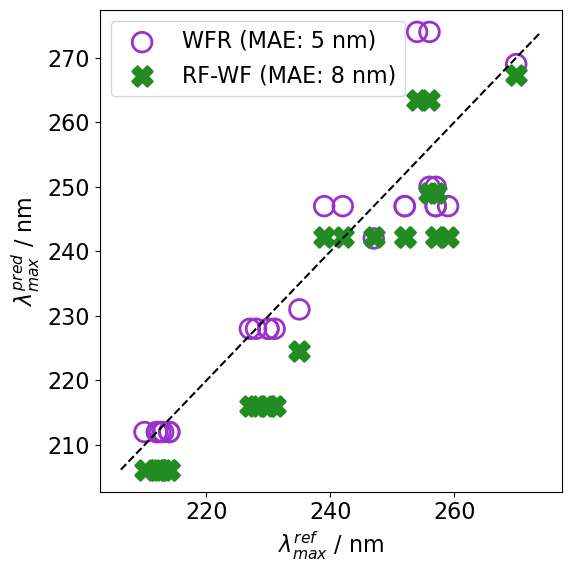

In [31]:
# predict on inference data
df_wf_ood['nm_rf_wf'] = model.predict(df_wf_ood[['exo', 'alpha_num', 'beta_num', 'Nsub']])

mae_rfp_ood = mean_absolute_error(df_wf_ood['nm_exp'], df_wf_ood['nm_rf_wf'])
mae_wf_ood = mean_absolute_error(df_wf_ood['nm_exp'], df_wf_ood['nm_wfr'])

# scatterplot predictions
fp.plot_multiple_scatter(
    df_wf_ood,
    x_col='nm_exp',
    y_cols=['nm_wfr', 'nm_rf_wf'],
    labels=[f'WFR (MAE: {int(mae_wf_ood)} nm)', f'RF-WF (MAE: {int(mae_rfp_ood)} nm)'],
    markers=['o', 'X'],
    colors=['darkorchid', 'forestgreen'],
    savepath='wf_rf-wf_inference.pdf'
)


In [32]:
#df_wf_ood.to_csv('data_wf_rf-fit_wfinformed_samples.csv')